### <b> This chapter focuses on the MNIST dataset. A dataset that is commonly referred to as the "hello world" of Machine Learning </b>

In [1]:
' Import the MNIST dataset'
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
' Inspect the arrays'
X, y = mnist['data'], mnist['target']
print(X.shape, y.shape)

(70000, 784) (70000,)


<b> The arrays are 70,000 rows with 784 features.  By default they are flattened 28x28 arrays of pixel intensity values which represent an image. </b>

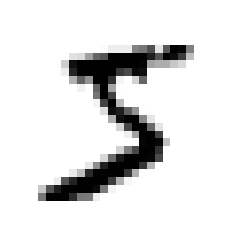

Target value:  5


In [10]:
' Observe the image represented in the first item of the data array'
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

digit = X.to_numpy()[0].reshape(28,28)
plt.imshow(digit, cmap='binary')
plt.axis('off')
plt.show()
print('Target value: ', y.to_numpy()[0])

In [17]:
' Convert the labels from strings to integers'
import numpy as np
y = y.astype(np.uint8)
y.describe

<bound method NDFrame.describe of 0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: uint8>

<b> By design the MNIST dataset is already split into a train and a test set.  The first 60,000 samples represent a shuffled training set and the remaining 10,000 are the test set. </b>

In [21]:
X_train, X_test, y_train, y_test = X.iloc[:60000], X.iloc[60000:], y.iloc[:60000], y.iloc[60000:]

<b> Training a Binary Classifier </b>

In [22]:
' To begin, simplify the problem to identify only a single digit. 5 and not-5.'

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

y_train_5

0         True
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997     True
59998    False
59999    False
Name: class, Length: 60000, dtype: bool

 #### A quick note about the SGD classifer ###
    
The Stochastic Gradient Descent (SGD) classifer deals with training instances independently, one at a time. This makes it well suited for both online learning and very large datasets. It relies on randomness during training and for replicable results its important to set a random_state parameter

In [34]:
' Train a SGD classifer'
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
sgd_clf.predict([digit.flatten()])

array([ True])

<b> Evaluating a classifier is trickier than evaluating a regressor. As such a large section of this chapter will be devoted to methods used in evaluting classifiers </b>